In [1]:
# Understanding the Attrition in HR. 

In [2]:
# Import all required packages

import numpy as np
import seaborn as sb
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import zscore
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import PowerTransformer
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
import joblib
import warnings
warnings.filterwarnings('ignore')

In [3]:
df = pd.read_csv("HR-Employee-Attrition.csv")

In [4]:
# Check all the info related to our data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   object
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   int64 
 7   EducationField            1470 non-null   object
 8   EmployeeCount             1470 non-null   int64 
 9   EmployeeNumber            1470 non-null   int64 
 10  EnvironmentSatisfaction   1470 non-null   int64 
 11  Gender                    1470 non-null   object
 12  HourlyRate                1470 non-null   int64 
 13  JobInvolvement            1470 non-null   int64 
 14  JobLevel                

In [5]:
df = pd.DataFrame(data=df)
df.head()

Age Attrition     BusinessTravel  DailyRate              Department  \
0   41       Yes      Travel_Rarely       1102                   Sales   
1   49        No  Travel_Frequently        279  Research & Development   
2   37       Yes      Travel_Rarely       1373  Research & Development   
3   33        No  Travel_Frequently       1392  Research & Development   
4   27        No      Travel_Rarely        591  Research & Development   

   DistanceFromHome  Education EducationField  EmployeeCount  EmployeeNumber  \
0                 1          2  Life Sciences              1               1   
1                 8          1  Life Sciences              1               2   
2                 2          2          Other              1               4   
3                 3          4  Life Sciences              1               5   
4                 2          1        Medical              1               7   

   ...  RelationshipSatisfaction StandardHours  StockOptionLevel  \
0  ...                         1            80                 0   
1  ...                         4            80                 1   
2  ...                         2            80                 0   
3  ...                         3            80                 0   
4  ...                         4            80                 1   

   TotalWorkingYears  TrainingTimesLastYear WorkLifeBalance  YearsAtCompany  \
0                  8                      0               1               6   
1                 10                      3               3              10   
2                  7                      3               3               0   
3                  8                      3               3               8   
4                  6                      3               3               2   

  YearsInCurrentRole  YearsSinceLastPromotion  YearsWithCurrManager  
0                  4                        0                     5  
1                  7                        1                     7  
2                  0                        0                     0  
3                  7                        3                     0  
4                  2                        2                     2  

[5 rows x 35 columns]

In [6]:
df.shape

(1470, 35)

In [7]:
df.columns

Index(['Age', 'Attrition', 'BusinessTravel', 'DailyRate', 'Department',
       'DistanceFromHome', 'Education', 'EducationField', 'EmployeeCount',
       'EmployeeNumber', 'EnvironmentSatisfaction', 'Gender', 'HourlyRate',
       'JobInvolvement', 'JobLevel', 'JobRole', 'JobSatisfaction',
       'MaritalStatus', 'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked',
       'Over18', 'OverTime', 'PercentSalaryHike', 'PerformanceRating',
       'RelationshipSatisfaction', 'StandardHours', 'StockOptionLevel',
       'TotalWorkingYears', 'TrainingTimesLastYear', 'WorkLifeBalance',
       'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion',
       'YearsWithCurrManager'],
      dtype='object')

In [8]:
df.describe()

Age    DailyRate  DistanceFromHome    Education  EmployeeCount  \
count  1470.000000  1470.000000       1470.000000  1470.000000         1470.0   
mean     36.923810   802.485714          9.192517     2.912925            1.0   
std       9.135373   403.509100          8.106864     1.024165            0.0   
min      18.000000   102.000000          1.000000     1.000000            1.0   
25%      30.000000   465.000000          2.000000     2.000000            1.0   
50%      36.000000   802.000000          7.000000     3.000000            1.0   
75%      43.000000  1157.000000         14.000000     4.000000            1.0   
max      60.000000  1499.000000         29.000000     5.000000            1.0   

       EmployeeNumber  EnvironmentSatisfaction   HourlyRate  JobInvolvement  \
count     1470.000000              1470.000000  1470.000000     1470.000000   
mean      1024.865306                 2.721769    65.891156        2.729932   
std        602.024335                 1.093082    20.329428        0.711561   
min          1.000000                 1.000000    30.000000        1.000000   
25%        491.250000                 2.000000    48.000000        2.000000   
50%       1020.500000                 3.000000    66.000000        3.000000   
75%       1555.750000                 4.000000    83.750000        3.000000   
max       2068.000000                 4.000000   100.000000        4.000000   

          JobLevel  ...  RelationshipSatisfaction  StandardHours  \
count  1470.000000  ...               1470.000000         1470.0   
mean      2.063946  ...                  2.712245           80.0   
std       1.106940  ...                  1.081209            0.0   
min       1.000000  ...                  1.000000           80.0   
25%       1.000000  ...                  2.000000           80.0   
50%       2.000000  ...                  3.000000           80.0   
75%       3.000000  ...                  4.000000           80.0   
max       5.000000  ...                  4.000000           80.0   

       StockOptionLevel  TotalWorkingYears  TrainingTimesLastYear  \
count       1470.000000        1470.000000            1470.000000   
mean           0.793878          11.279592               2.799320   
std            0.852077           7.780782               1.289271   
min            0.000000           0.000000               0.000000   
25%            0.000000           6.000000               2.000000   
50%            1.000000          10.000000               3.000000   
75%            1.000000          15.000000               3.000000   
max            3.000000          40.000000               6.000000   

       WorkLifeBalance  YearsAtCompany  YearsInCurrentRole  \
count      1470.000000     1470.000000         1470.000000   
mean          2.761224        7.008163            4.229252   
std           0.706476        6.126525            3.623137   
min           1.000000        0.000000            0.000000   
25%           2.000000        3.000000            2.000000   
50%           3.000000        5.000000            3.000000   
75%           3.000000        9.000000            7.000000   
max           4.000000       40.000000           18.000000   

       YearsSinceLastPromotion  YearsWithCurrManager  
count              1470.000000           1470.000000  
mean                  2.187755              4.123129  
std                   3.222430              3.568136  
min                   0.000000              0.000000  
25%                   0.000000              2.000000  
50%                   1.000000              3.000000  
75%                   3.000000              7.000000  
max                  15.000000             17.000000  

[8 rows x 26 columns]

In [9]:
# We will drop the unnecessary columns
df.drop(['EmployeeNumber','StandardHours'], axis=1,inplace=True)

In [10]:
df.head()

Age Attrition     BusinessTravel  DailyRate              Department  \
0   41       Yes      Travel_Rarely       1102                   Sales   
1   49        No  Travel_Frequently        279  Research & Development   
2   37       Yes      Travel_Rarely       1373  Research & Development   
3   33        No  Travel_Frequently       1392  Research & Development   
4   27        No      Travel_Rarely        591  Research & Development   

   DistanceFromHome  Education EducationField  EmployeeCount  \
0                 1          2  Life Sciences              1   
1                 8          1  Life Sciences              1   
2                 2          2          Other              1   
3                 3          4  Life Sciences              1   
4                 2          1        Medical              1   

   EnvironmentSatisfaction  ... PerformanceRating  RelationshipSatisfaction  \
0                        2  ...                 3                         1   
1                        3  ...                 4                         4   
2                        4  ...                 3                         2   
3                        4  ...                 3                         3   
4                        1  ...                 3                         4   

   StockOptionLevel  TotalWorkingYears TrainingTimesLastYear  WorkLifeBalance  \
0                 0                  8                     0                1   
1                 1                 10                     3                3   
2                 0                  7                     3                3   
3                 0                  8                     3                3   
4                 1                  6                     3                3   

  YearsAtCompany  YearsInCurrentRole  YearsSinceLastPromotion  \
0              6                   4                        0   
1             10                   7                        1   
2              0                   0                        0   
3              8                   7                        3   
4              2                   2                        2   

   YearsWithCurrManager  
0                     5  
1                     7  
2                     0  
3                     0  
4                     2  

[5 rows x 33 columns]

In [11]:
# Now we will perform data types conversion where required
from sklearn.preprocessing import LabelEncoder

In [12]:
df['Attrition']=df['Attrition'].apply(lambda x : 1 if x=='Yes' else 0)

In [13]:
df.head()

Age  Attrition     BusinessTravel  DailyRate              Department  \
0   41          1      Travel_Rarely       1102                   Sales   
1   49          0  Travel_Frequently        279  Research & Development   
2   37          1      Travel_Rarely       1373  Research & Development   
3   33          0  Travel_Frequently       1392  Research & Development   
4   27          0      Travel_Rarely        591  Research & Development   

   DistanceFromHome  Education EducationField  EmployeeCount  \
0                 1          2  Life Sciences              1   
1                 8          1  Life Sciences              1   
2                 2          2          Other              1   
3                 3          4  Life Sciences              1   
4                 2          1        Medical              1   

   EnvironmentSatisfaction  ... PerformanceRating  RelationshipSatisfaction  \
0                        2  ...                 3                         1   
1                        3  ...                 4                         4   
2                        4  ...                 3                         2   
3                        4  ...                 3                         3   
4                        1  ...                 3                         4   

   StockOptionLevel  TotalWorkingYears TrainingTimesLastYear  WorkLifeBalance  \
0                 0                  8                     0                1   
1                 1                 10                     3                3   
2                 0                  7                     3                3   
3                 0                  8                     3                3   
4                 1                  6                     3                3   

  YearsAtCompany  YearsInCurrentRole  YearsSinceLastPromotion  \
0              6                   4                        0   
1             10                   7                        1   
2              0                   0                        0   
3              8                   7                        3   
4              2                   2                        2   

   YearsWithCurrManager  
0                     5  
1                     7  
2                     0  
3                     0  
4                     2  

[5 rows x 33 columns]

In [14]:
df.isnull().sum()

Age                         0
Attrition                   0
BusinessTravel              0
DailyRate                   0
Department                  0
DistanceFromHome            0
Education                   0
EducationField              0
EmployeeCount               0
EnvironmentSatisfaction     0
Gender                      0
HourlyRate                  0
JobInvolvement              0
JobLevel                    0
JobRole                     0
JobSatisfaction             0
MaritalStatus               0
MonthlyIncome               0
MonthlyRate                 0
NumCompaniesWorked          0
Over18                      0
OverTime                    0
PercentSalaryHike           0
PerformanceRating           0
RelationshipSatisfaction    0
StockOptionLevel            0
TotalWorkingYears           0
TrainingTimesLastYear       0
WorkLifeBalance             0
YearsAtCompany              0
YearsInCurrentRole          0
YearsSinceLastPromotion     0
YearsWithCurrManager        0
dtype: int

# Visualization

In [15]:
def categorical_column(col_name):
    f,ax = plt.subplots(1,2, figsize=(10,6))
     
    df[col_name].value_counts().plot.bar(cmap='Set2',ax=ax[0])
    ax[1].set_title(f'Number of Employee by {col_name}')
    ax[1].set_ylabel('Count')
    ax[1].set_xlabel(f'{col_name}')
    
    
    sb.countplot(col_name, hue='Attrition',data=df, ax=ax[1], palette='Set2')
    ax[1].set_title(f'Attrition by {col_name}')
    ax[1].set_xlabel(f'{col_name}')
    ax[1].set_ylabel('Count')

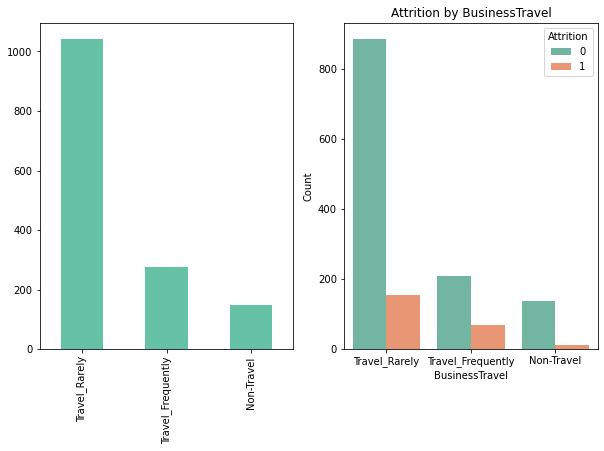

In [16]:
categorical_column('BusinessTravel')

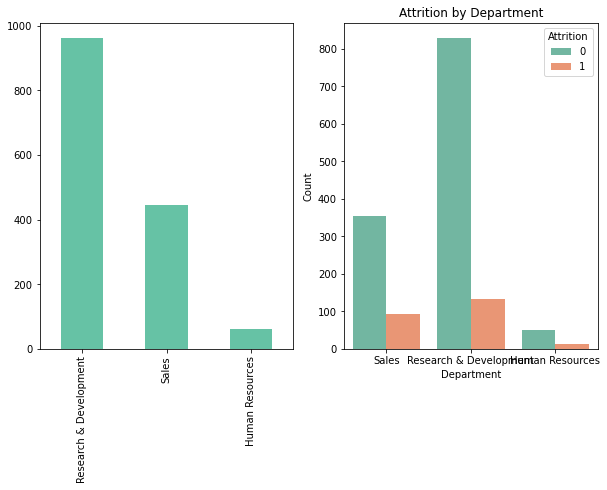

In [17]:
categorical_column('Department')

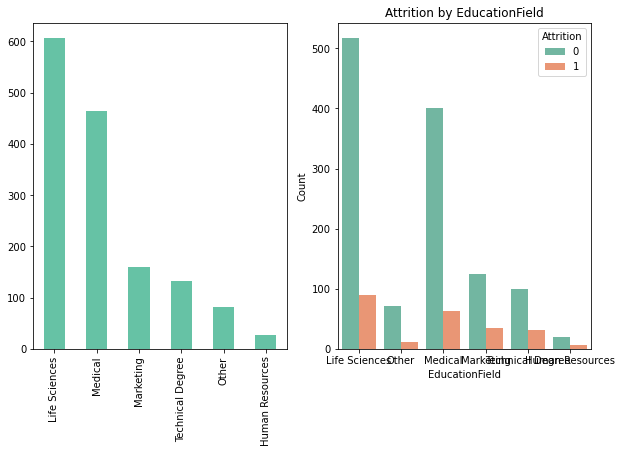

In [18]:
categorical_column('EducationField')

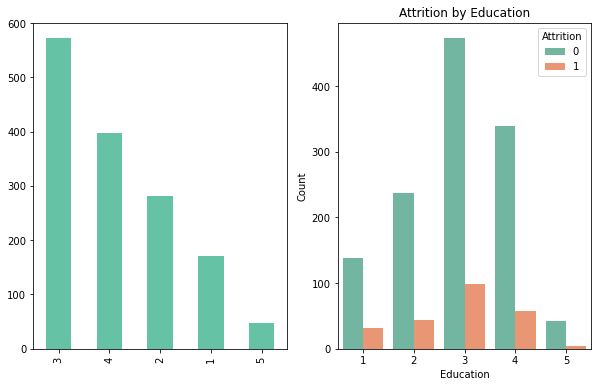

In [19]:
categorical_column('Education')

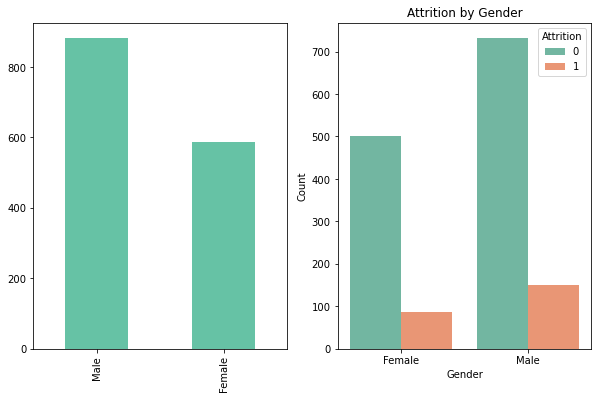

In [20]:
categorical_column('Gender')

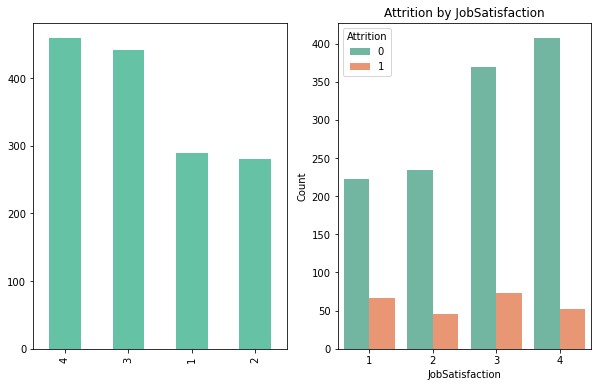

In [21]:
categorical_column('JobSatisfaction')

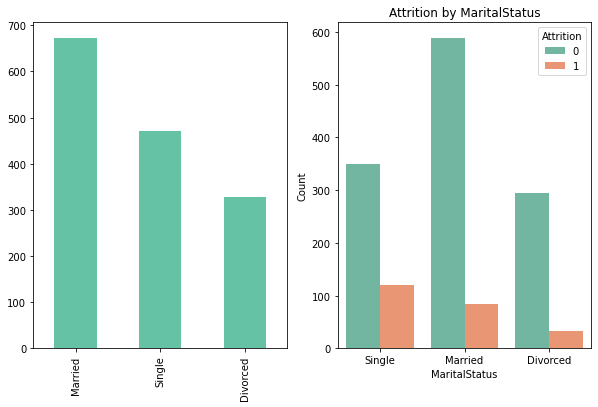

In [22]:
categorical_column('MaritalStatus')

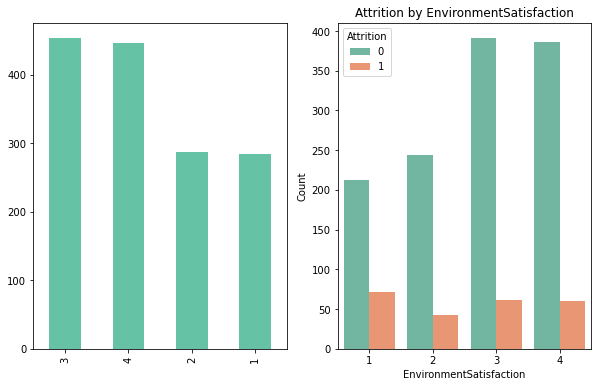

In [23]:
categorical_column('EnvironmentSatisfaction')

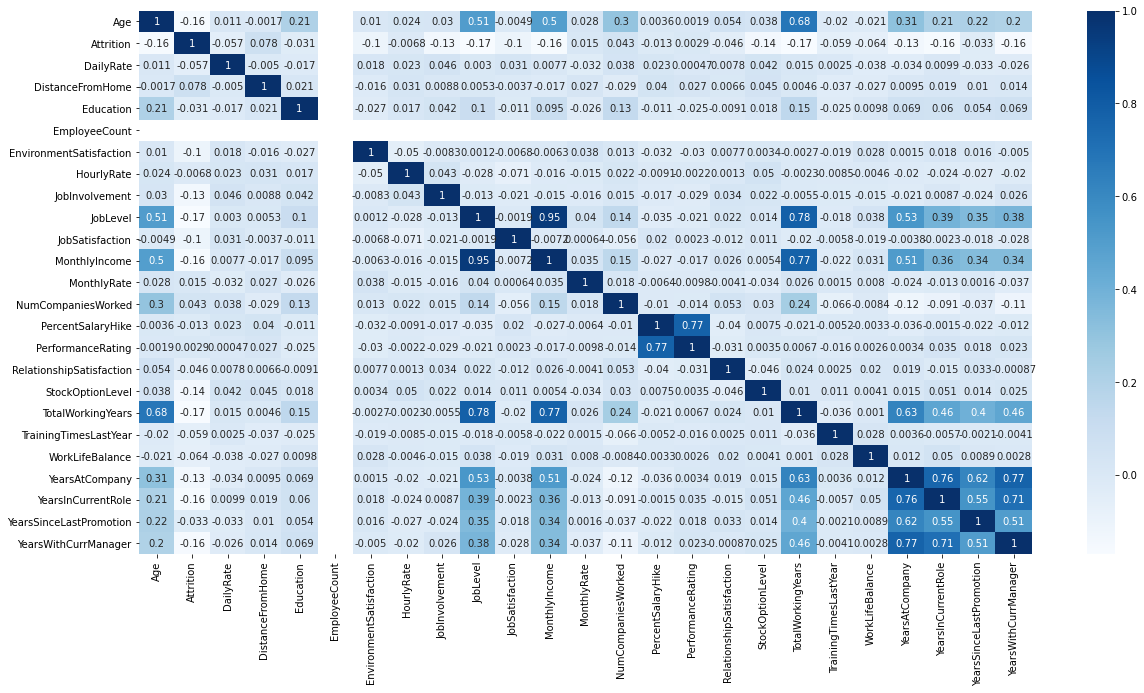

In [24]:
#Check correlation
fig=plt.figure(figsize=(20,10))
hc=df.corr(method='pearson')
sb.heatmap(hc,annot=True,cmap="Blues")

In [25]:
df.drop('MonthlyRate', axis=1, inplace=True)
df.drop('PercentSalaryHike', axis=1, inplace=True)

In [26]:
df.drop(['EnvironmentSatisfaction','JobInvolvement','JobSatisfaction','RelationshipSatisfaction','WorkLifeBalance'], axis=1, inplace=True)

In [27]:
df.head()

Age  Attrition     BusinessTravel  DailyRate              Department  \
0   41          1      Travel_Rarely       1102                   Sales   
1   49          0  Travel_Frequently        279  Research & Development   
2   37          1      Travel_Rarely       1373  Research & Development   
3   33          0  Travel_Frequently       1392  Research & Development   
4   27          0      Travel_Rarely        591  Research & Development   

   DistanceFromHome  Education EducationField  EmployeeCount  Gender  ...  \
0                 1          2  Life Sciences              1  Female  ...   
1                 8          1  Life Sciences              1    Male  ...   
2                 2          2          Other              1    Male  ...   
3                 3          4  Life Sciences              1  Female  ...   
4                 2          1        Medical              1    Male  ...   

   Over18  OverTime PerformanceRating StockOptionLevel  TotalWorkingYears  \
0       Y       Yes                 3                0                  8   
1       Y        No                 4                1                 10   
2       Y       Yes                 3                0                  7   
3       Y       Yes                 3                0                  8   
4       Y        No                 3                1                  6   

   TrainingTimesLastYear YearsAtCompany YearsInCurrentRole  \
0                      0              6                  4   
1                      3             10                  7   
2                      3              0                  0   
3                      3              8                  7   
4                      3              2                  2   

   YearsSinceLastPromotion  YearsWithCurrManager  
0                        0                     5  
1                        1                     7  
2                        0                     0  
3                        3                     0  
4                        2                     2  

[5 rows x 26 columns]

In [28]:
df.dtypes

Age                         int64
Attrition                   int64
BusinessTravel             object
DailyRate                   int64
Department                 object
DistanceFromHome            int64
Education                   int64
EducationField             object
EmployeeCount               int64
Gender                     object
HourlyRate                  int64
JobLevel                    int64
JobRole                    object
MaritalStatus              object
MonthlyIncome               int64
NumCompaniesWorked          int64
Over18                     object
OverTime                   object
PerformanceRating           int64
StockOptionLevel            int64
TotalWorkingYears           int64
TrainingTimesLastYear       int64
YearsAtCompany              int64
YearsInCurrentRole          int64
YearsSinceLastPromotion     int64
YearsWithCurrManager        int64
dtype: object

In [29]:
from sklearn.preprocessing import OrdinalEncoder

In [30]:
oe = OrdinalEncoder()

for i in df.columns:
    if df[i].dtypes == "object":
        df[i]=oe.fit_transform(df[i].values.reshape(-1,1))

In [31]:
df

Age  Attrition  BusinessTravel  DailyRate  Department  DistanceFromHome  \
0      41          1             2.0       1102         2.0                 1   
1      49          0             1.0        279         1.0                 8   
2      37          1             2.0       1373         1.0                 2   
3      33          0             1.0       1392         1.0                 3   
4      27          0             2.0        591         1.0                 2   
...   ...        ...             ...        ...         ...               ...   
1465   36          0             1.0        884         1.0                23   
1466   39          0             2.0        613         1.0                 6   
1467   27          0             2.0        155         1.0                 4   
1468   49          0             1.0       1023         2.0                 2   
1469   34          0             2.0        628         1.0                 8   

      Education  EducationField  EmployeeCount  Gender  ...  Over18  OverTime  \
0             2             1.0              1     0.0  ...     0.0       1.0   
1             1             1.0              1     1.0  ...     0.0       0.0   
2             2             4.0              1     1.0  ...     0.0       1.0   
3             4             1.0              1     0.0  ...     0.0       1.0   
4             1             3.0              1     1.0  ...     0.0       0.0   
...         ...             ...            ...     ...  ...     ...       ...   
1465          2             3.0              1     1.0  ...     0.0       0.0   
1466          1             3.0              1     1.0  ...     0.0       0.0   
1467          3             1.0              1     1.0  ...     0.0       1.0   
1468          3             3.0              1     1.0  ...     0.0       0.0   
1469          3             3.0              1     1.0  ...     0.0       0.0   

      PerformanceRating  StockOptionLevel  TotalWorkingYears  \
0                     3                 0                  8   
1                     4                 1                 10   
2                     3                 0                  7   
3                     3                 0                  8   
4                     3                 1                  6   
...                 ...               ...                ...   
1465                  3                 1                 17   
1466                  3                 1                  9   
1467                  4                 1                  6   
1468                  3                 0                 17   
1469                  3                 0                  6   

      TrainingTimesLastYear  YearsAtCompany  YearsInCurrentRole  \
0                         0               6                   4   
1                         3              10                   7   
2                         3               0                   0   
3                         3               8                   7   
4                         3               2                   2   
...                     ...             ...                 ...   
1465                      3               5                   2   
1466                      5               7                   7   
1467                      0               6                   2   
1468                      3               9                   6   
1469                      3               4                   3   

      YearsSinceLastPromotion  YearsWithCurrManager  
0                           0                     5  
1                           1                     7  
2                           0                     0  
3                           3                     0  
4                           2                     2  
...                       ...                   ...  
1465                        0                     3  
1466                        1                     7  


Age                           AxesSubplot(0.125,0.749828;0.0824468x0.130172)
Attrition                  AxesSubplot(0.223936,0.749828;0.0824468x0.130172)
BusinessTravel             AxesSubplot(0.322872,0.749828;0.0824468x0.130172)
DailyRate                  AxesSubplot(0.421809,0.749828;0.0824468x0.130172)
Department                 AxesSubplot(0.520745,0.749828;0.0824468x0.130172)
DistanceFromHome           AxesSubplot(0.619681,0.749828;0.0824468x0.130172)
Education                  AxesSubplot(0.718617,0.749828;0.0824468x0.130172)
EducationField             AxesSubplot(0.817553,0.749828;0.0824468x0.130172)
EmployeeCount                 AxesSubplot(0.125,0.593621;0.0824468x0.130172)
Gender                     AxesSubplot(0.223936,0.593621;0.0824468x0.130172)
HourlyRate                 AxesSubplot(0.322872,0.593621;0.0824468x0.130172)
JobLevel                   AxesSubplot(0.421809,0.593621;0.0824468x0.130172)
JobRole                    AxesSubplot(0.520745,0.593621;0.0824468x0.130172)

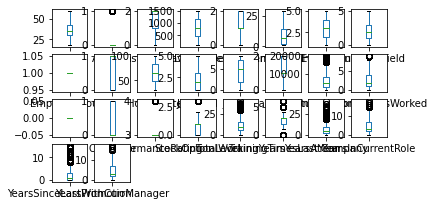

In [32]:
df.plot(kind='box',subplots=True,layout=(5,8))

In [33]:
df.skew()

Age                        0.413286
Attrition                  1.844366
BusinessTravel            -1.439006
DailyRate                 -0.003519
Department                 0.172231
DistanceFromHome           0.958118
Education                 -0.289681
EducationField             0.550371
EmployeeCount              0.000000
Gender                    -0.408665
HourlyRate                -0.032311
JobLevel                   1.025401
JobRole                   -0.357270
MaritalStatus             -0.152175
MonthlyIncome              1.369817
NumCompaniesWorked         1.026471
Over18                     0.000000
OverTime                   0.964489
PerformanceRating          1.921883
StockOptionLevel           0.968980
TotalWorkingYears          1.117172
TrainingTimesLastYear      0.553124
YearsAtCompany             1.764529
YearsInCurrentRole         0.917363
YearsSinceLastPromotion    1.984290
YearsWithCurrManager       0.833451
dtype: float64

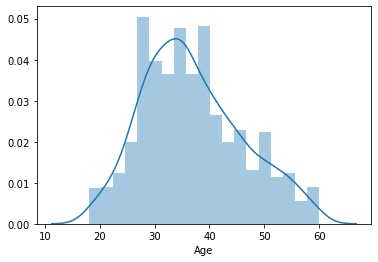

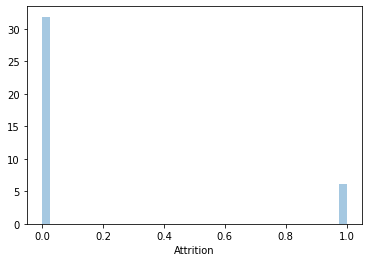

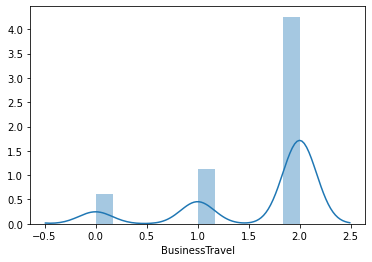

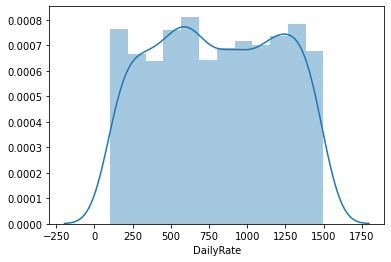

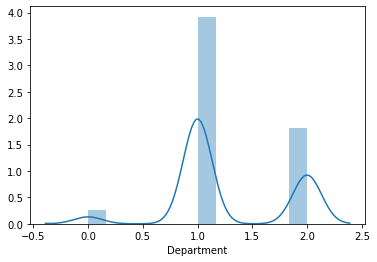

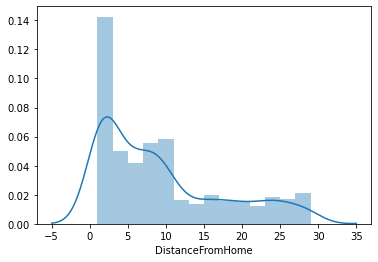

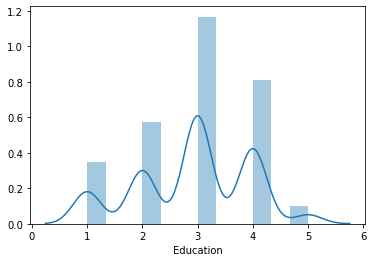

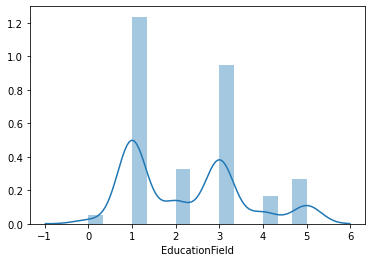

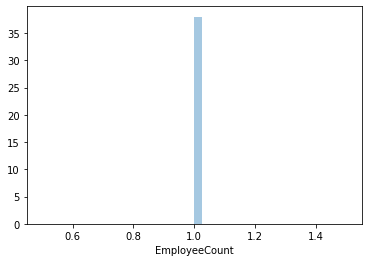

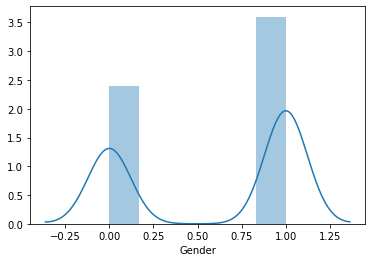

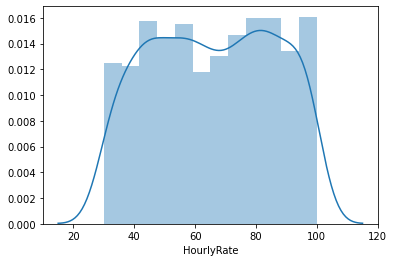

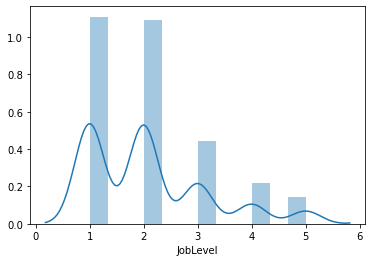

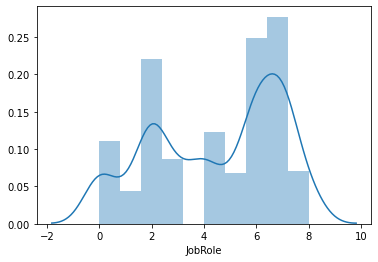

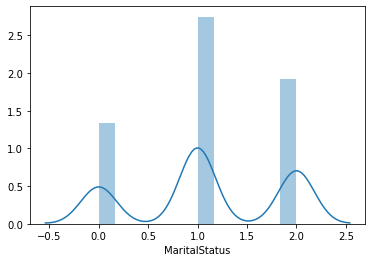

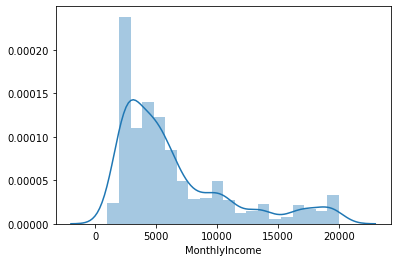

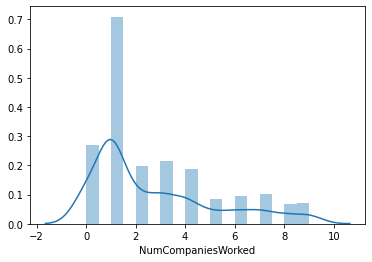

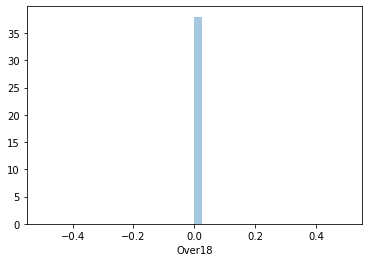

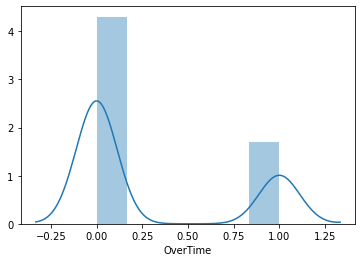

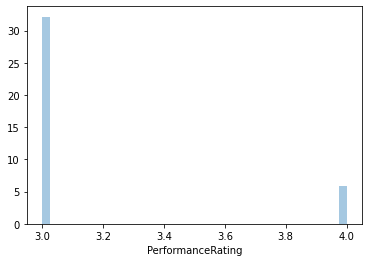

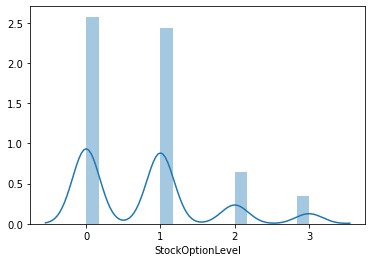

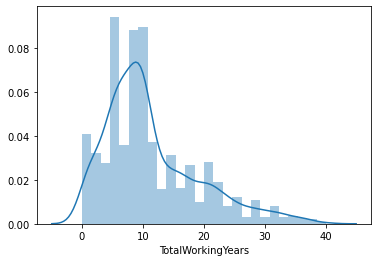

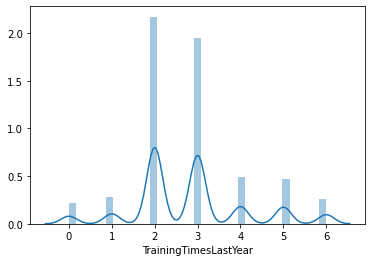

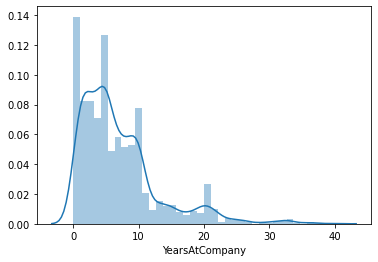

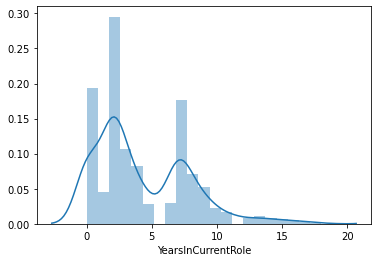

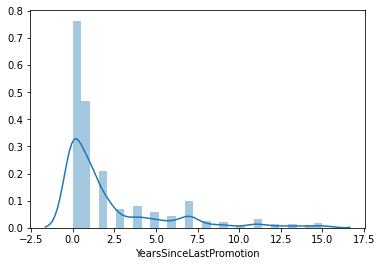

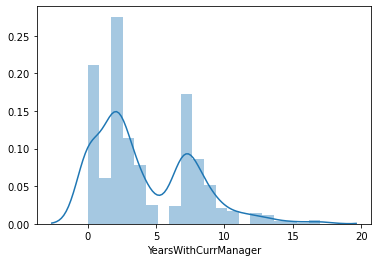

In [34]:
for i in df.columns:
    plt.figure()
    sb.distplot(df[i])

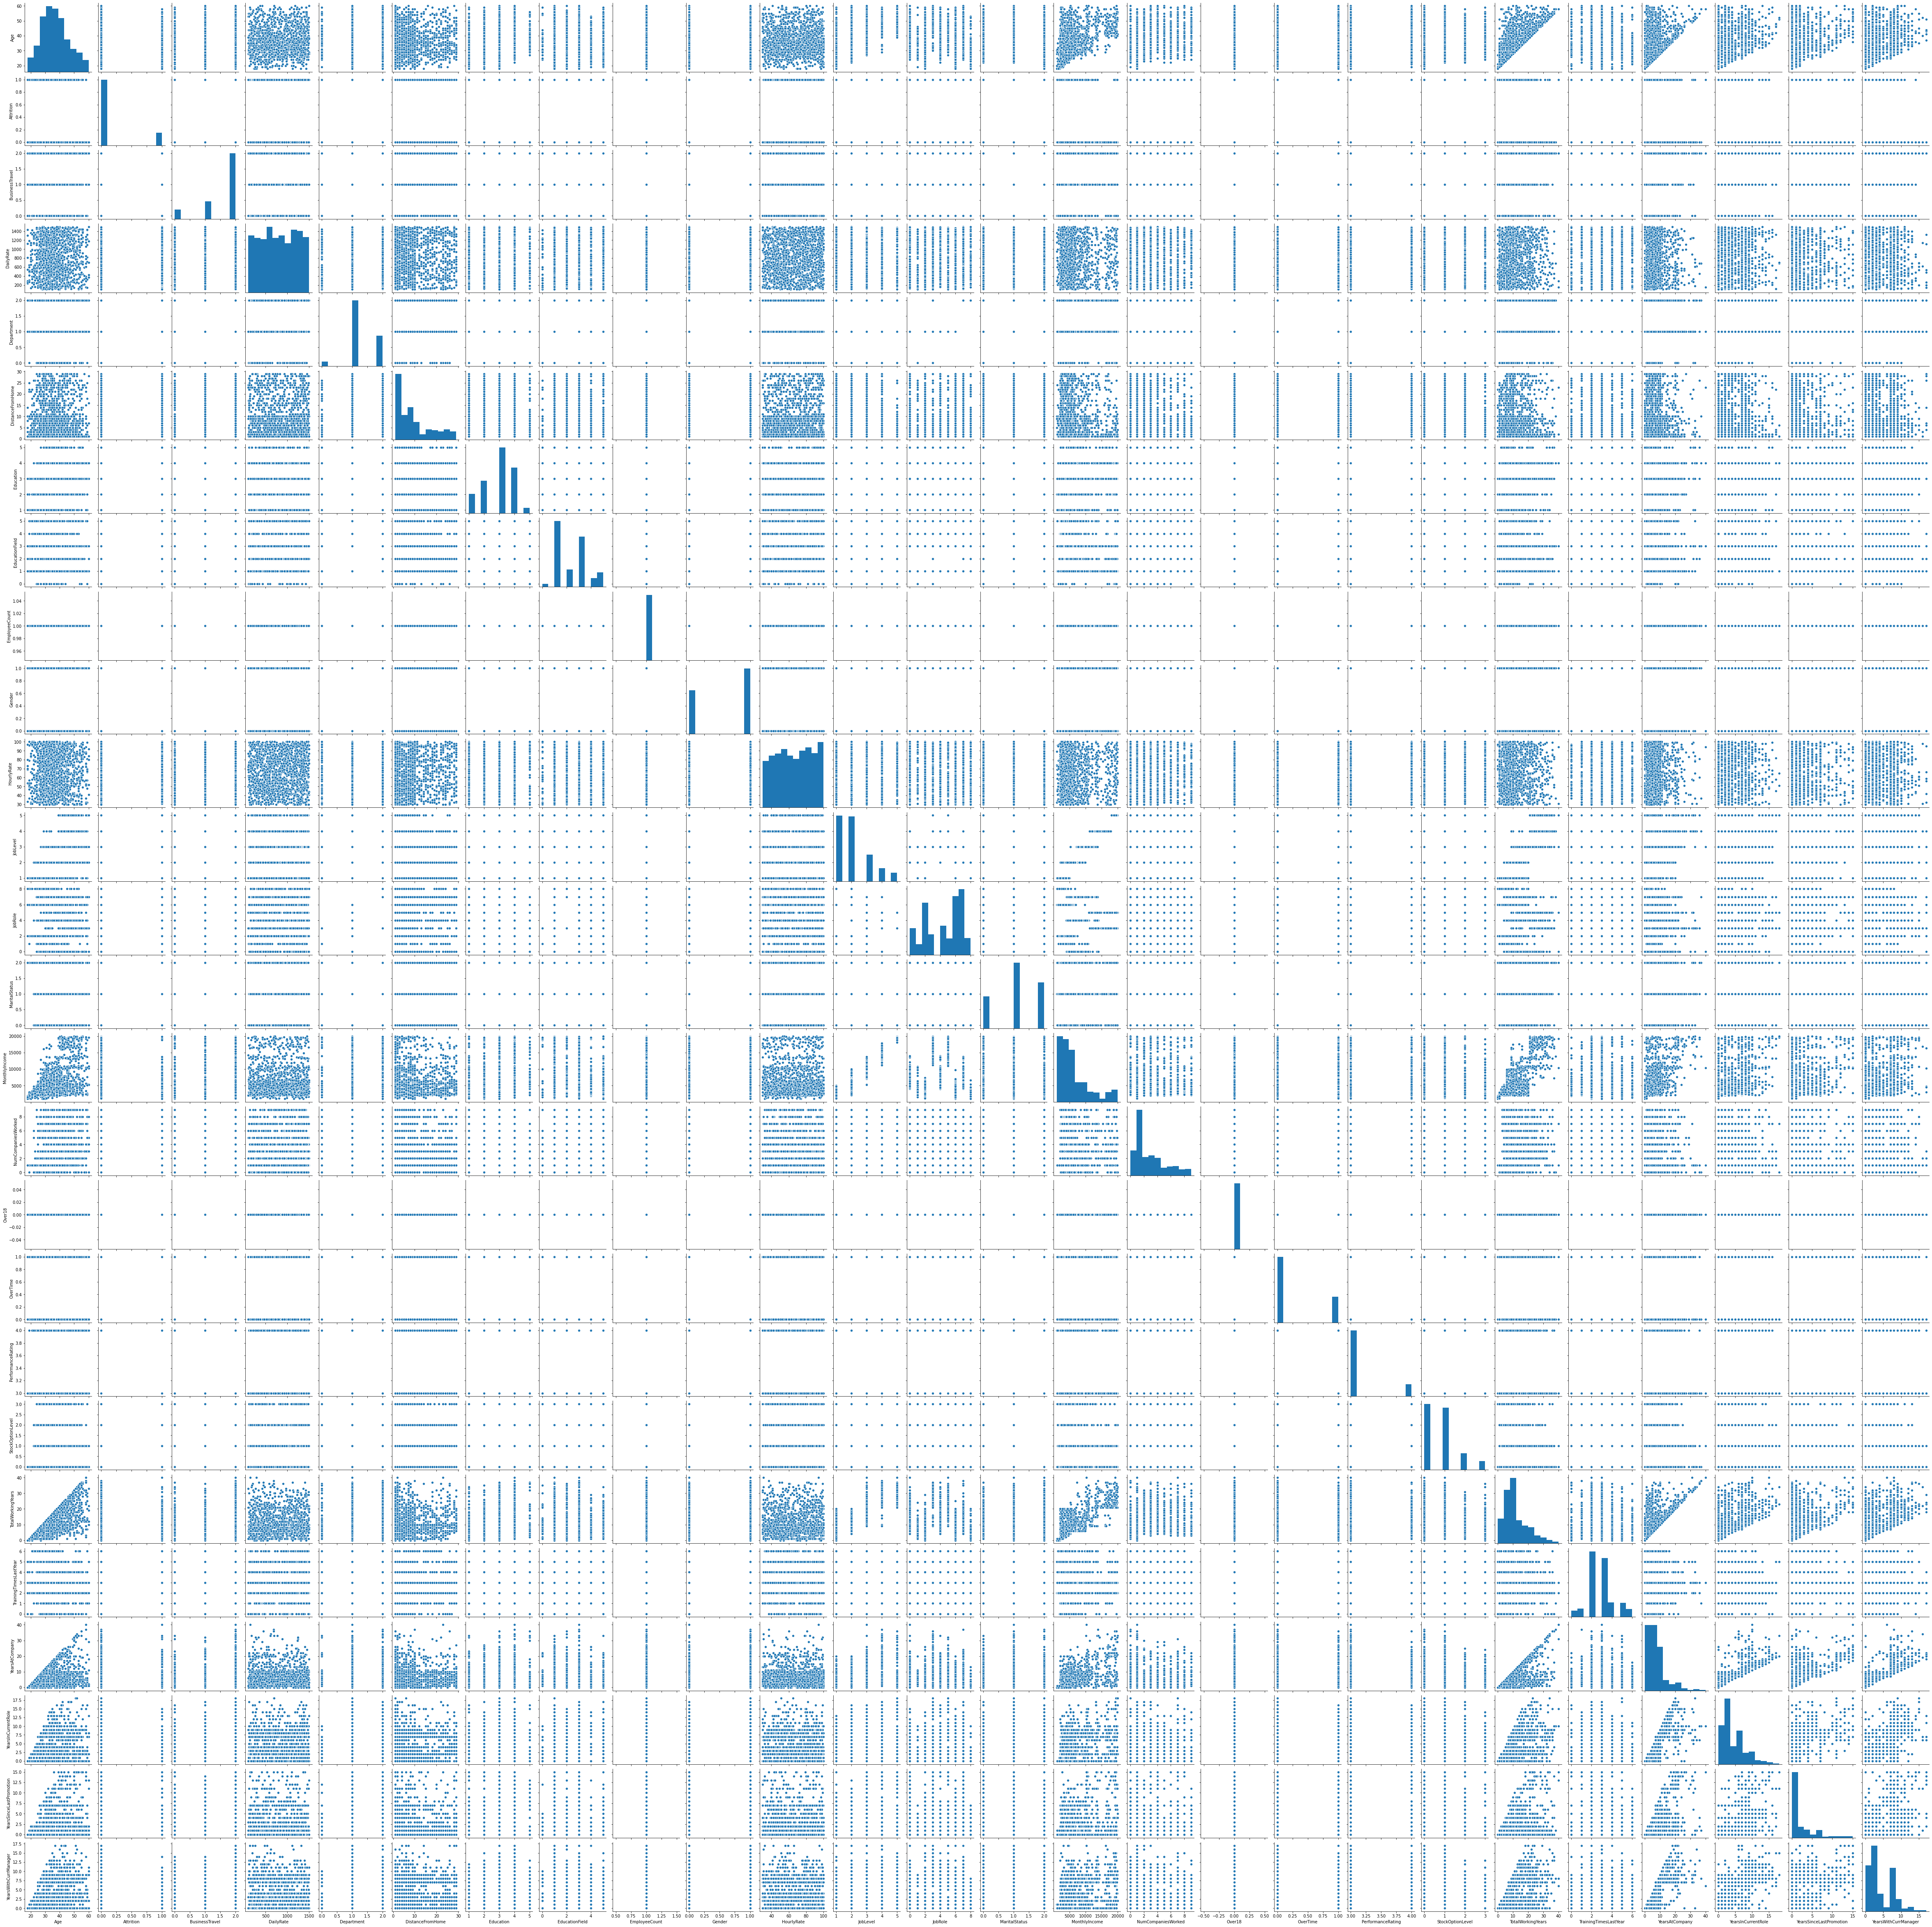

In [35]:
sb.pairplot(df)

In [36]:
dfx = df.corr()
dfx

Age  Attrition  BusinessTravel  DailyRate  \
Age                      1.000000  -0.159205        0.024751   0.010661   
Attrition               -0.159205   1.000000        0.000074  -0.056652   
BusinessTravel           0.024751   0.000074        1.000000  -0.004086   
DailyRate                0.010661  -0.056652       -0.004086   1.000000   
Department              -0.031882   0.063991       -0.009044   0.007109   
DistanceFromHome        -0.001686   0.077924       -0.024469  -0.004985   
Education                0.208034  -0.031373        0.000757  -0.016806   
EducationField          -0.040873   0.026846        0.023724   0.037709   
EmployeeCount                 NaN        NaN             NaN        NaN   
Gender                  -0.036311   0.029453       -0.032981  -0.011716   
HourlyRate               0.024287  -0.006846        0.026528   0.023381   
JobLevel                 0.509604  -0.169105        0.019311   0.002966   
JobRole                 -0.122427   0.067151        0.002724  -0.009472   
MaritalStatus           -0.095029   0.162070        0.024001  -0.069586   
MonthlyIncome            0.497855  -0.159840        0.034319   0.007707   
NumCompaniesWorked       0.299635   0.043494        0.020875   0.038153   
Over18                        NaN        NaN             NaN        NaN   
OverTime                 0.028062   0.246118        0.016543   0.009135   
PerformanceRating        0.001904   0.002889       -0.026341   0.000473   
StockOptionLevel         0.037510  -0.137145       -0.016727   0.042143   
TotalWorkingYears        0.680381  -0.171063        0.034226   0.014515   
TrainingTimesLastYear   -0.019621  -0.059478        0.015240   0.002453   
YearsAtCompany           0.311309  -0.134392       -0.014575  -0.034055   
YearsInCurrentRole       0.212901  -0.160545       -0.011497   0.009932   
YearsSinceLastPromotion  0.216513  -0.033019       -0.032591  -0.033229   
YearsWithCurrManager     0.202089  -0.156199       -0.022636  -0.026363   

                         Department  DistanceFromHome  Education  \
Age                       -0.031882         -0.001686   0.208034   
Attrition                  0.063991          0.077924  -0.031373   
BusinessTravel            -0.009044         -0.024469   0.000757   
DailyRate                  0.007109         -0.004985  -0.016806   
Department                 1.000000          0.017225   0.007996   
DistanceFromHome           0.017225          1.000000   0.021042   
Education                  0.007996          0.021042   1.000000   
EducationField             0.013720          0.002013  -0.039592   
EmployeeCount                   NaN               NaN        NaN   
Gender                    -0.041583         -0.001851  -0.016547   
HourlyRate                -0.004144          0.031131   0.016775   
JobLevel                   0.101963          0.005303   0.101589   
JobRole                    0.662431         -0.001015   0.004236   
MaritalStatus              0.056073         -0.014437   0.004053   
MonthlyIncome              0.053130         -0.017014   0.094961   
NumCompaniesWorked        -0.035882         -0.029251   0.126317   
Over18                          NaN               NaN        NaN   
OverTime                   0.007481          0.025514  -0.020322   
PerformanceRating         -0.024604          0.027110  -0.024539   
StockOptionLevel          -0.012193          0.044872   0.018422   
TotalWorkingYears         -0.015762          0.004628   0.148280   
TrainingTimesLastYear      0.036875         -0.036942  -0.025100   
YearsAtCompany             0.022920          0.009508   0.069114   
YearsInCurrentRole         0.056315          0.018845   0.060236   
YearsSinceLastPromotion    0.040061          0.010029   0.054254   
YearsWithCurrManager       0.034282          0.014406   0.069065   

                         EducationField  EmployeeCount    Gender  ...  Over18  \
Age                           -0.040873            NaN -0.036311  ...     NaN   
Attri

In [37]:
df.columns

Index(['Age', 'Attrition', 'BusinessTravel', 'DailyRate', 'Department',
       'DistanceFromHome', 'Education', 'EducationField', 'EmployeeCount',
       'Gender', 'HourlyRate', 'JobLevel', 'JobRole', 'MaritalStatus',
       'MonthlyIncome', 'NumCompaniesWorked', 'Over18', 'OverTime',
       'PerformanceRating', 'StockOptionLevel', 'TotalWorkingYears',
       'TrainingTimesLastYear', 'YearsAtCompany', 'YearsInCurrentRole',
       'YearsSinceLastPromotion', 'YearsWithCurrManager'],
      dtype='object')

In [38]:
df_x=df.drop(columns=['Attrition'])
y=df[['Attrition']]

In [39]:
df_x.shape

(1470, 25)

In [40]:
df_x.head()

Age  BusinessTravel  DailyRate  Department  DistanceFromHome  Education  \
0   41             2.0       1102         2.0                 1          2   
1   49             1.0        279         1.0                 8          1   
2   37             2.0       1373         1.0                 2          2   
3   33             1.0       1392         1.0                 3          4   
4   27             2.0        591         1.0                 2          1   

   EducationField  EmployeeCount  Gender  HourlyRate  ...  Over18  OverTime  \
0             1.0              1     0.0          94  ...     0.0       1.0   
1             1.0              1     1.0          61  ...     0.0       0.0   
2             4.0              1     1.0          92  ...     0.0       1.0   
3             1.0              1     0.0          56  ...     0.0       1.0   
4             3.0              1     1.0          40  ...     0.0       0.0   

   PerformanceRating  StockOptionLevel  TotalWorkingYears  \
0                  3                 0                  8   
1                  4                 1                 10   
2                  3                 0                  7   
3                  3                 0                  8   
4                  3                 1                  6   

   TrainingTimesLastYear  YearsAtCompany  YearsInCurrentRole  \
0                      0               6                   4   
1                      3              10                   7   
2                      3               0                   0   
3                      3               8                   7   
4                      3               2                   2   

   YearsSinceLastPromotion  YearsWithCurrManager  
0                        0                     5  
1                        1                     7  
2                        0                     0  
3                        3                     0  
4                        2                     2  

[5 rows x 25 columns]

In [41]:
y.shape

(1470, 1)

In [42]:
y.head()

Attrition
0          1
1          0
2          1
3          0
4          0

In [43]:
for i in df_x.columns:
    if df_x[i].skew()>0.5:
        df_x[i]=np.cbrt(df_x[i])
    if df_x[i].skew()<-0.5:
        df_x[i]=np.cbrt(df_x[i])
        
df_x.skew()

Age                        0.413286
BusinessTravel            -2.319100
DailyRate                 -0.003519
Department                 0.172231
DistanceFromHome           0.186998
Education                 -0.289681
EducationField            -5.117249
EmployeeCount              0.000000
Gender                    -0.408665
HourlyRate                -0.032311
JobLevel                   0.460775
JobRole                   -0.357270
MaritalStatus             -0.152175
MonthlyIncome              0.677032
NumCompaniesWorked        -1.909450
Over18                     0.000000
OverTime                   0.964489
PerformanceRating          1.921883
StockOptionLevel          -0.139490
TotalWorkingYears         -0.395296
TrainingTimesLastYear     -4.523787
YearsAtCompany            -0.367351
YearsInCurrentRole        -1.657610
YearsSinceLastPromotion    0.198634
YearsWithCurrManager      -1.547889
dtype: float64

In [44]:
df_x

Age  BusinessTravel  DailyRate  Department  DistanceFromHome  Education  \
0      41        1.259921       1102         2.0          1.000000          2   
1      49        1.000000        279         1.0          2.000000          1   
2      37        1.259921       1373         1.0          1.259921          2   
3      33        1.000000       1392         1.0          1.442250          4   
4      27        1.259921        591         1.0          1.259921          1   
...   ...             ...        ...         ...               ...        ...   
1465   36        1.000000        884         1.0          2.843867          2   
1466   39        1.259921        613         1.0          1.817121          1   
1467   27        1.259921        155         1.0          1.587401          3   
1468   49        1.000000       1023         2.0          1.259921          3   
1469   34        1.259921        628         1.0          2.000000          3   

      EducationField  EmployeeCount  Gender  HourlyRate  ...  Over18  \
0           1.000000              1     0.0          94  ...     0.0   
1           1.000000              1     1.0          61  ...     0.0   
2           1.166529              1     1.0          92  ...     0.0   
3           1.000000              1     0.0          56  ...     0.0   
4           1.129831              1     1.0          40  ...     0.0   
...              ...            ...     ...         ...  ...     ...   
1465        1.129831              1     1.0          41  ...     0.0   
1466        1.129831              1     1.0          42  ...     0.0   
1467        1.000000              1     1.0          87  ...     0.0   
1468        1.129831              1     1.0          63  ...     0.0   
1469        1.129831              1     1.0          82  ...     0.0   

      OverTime  PerformanceRating  StockOptionLevel  TotalWorkingYears  \
0          1.0           1.442250               0.0           2.000000   
1          0.0           1.587401               1.0           2.154435   
2          1.0           1.442250               0.0           1.912931   
3          1.0           1.442250               0.0           2.000000   
4          0.0           1.442250               1.0           1.817121   
...        ...                ...               ...                ...   
1465       0.0           1.442250               1.0           2.571282   
1466       0.0           1.442250               1.0           2.080084   
1467       1.0           1.587401               1.0           1.817121   
1468       0.0           1.442250               0.0           2.571282   
1469       0.0           1.442250               0.0           1.817121   

      TrainingTimesLastYear  YearsAtCompany  YearsInCurrentRole  \
0                  0.000000        1.817121            1.166529   
1                  1.129831        2.154435            1.241366   
2                  1.129831        0.000000            0.000000   
3                  1.129831        2.000000            1.241366   
4                  1.129831        1.259921            1.080060   
...                     ...             ...                 ...   
1465               1.129831        1.709976            1.080060   
1466               1.195813        1.912931            1.241366   
1467               0.000000        1.817121            1.080060   
1468               1.129831        2.080084            1.220285   
1469               1.129831        1.587401            1.129831   

      YearsSinceLastPromotion  YearsWithCurrManager  
0                    0.000000              1.195813  
1                    1.000000              1.241366  
2                    0.000000              0.000000  
3                    1.442250              0.000000  
4                    1.259921              1.080060  
...                       ...                   ...  
1465                 0.000000              1.129831  
1466                 1.000000             

In [45]:
#lets bring all feature to a common sales
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
x=sc.fit_transform(df_x)
x=pd.DataFrame(x,columns=df_x.columns)
x

Age  BusinessTravel  DailyRate  Department  DistanceFromHome  \
0     0.446350        0.469186   0.742527    1.401512         -1.412629   
1     1.322365       -0.217702  -1.297775   -0.493817          0.159829   
2     0.008343        0.469186   1.414363   -0.493817         -1.003914   
3    -0.429664       -0.217702   1.461466   -0.493817         -0.717210   
4    -1.086676        0.469186  -0.524295   -0.493817         -1.003914   
...        ...             ...        ...         ...               ...   
1465 -0.101159       -0.217702   0.202082   -0.493817          1.486775   
1466  0.227347        0.469186  -0.469754   -0.493817         -0.127741   
1467 -1.086676        0.469186  -1.605183   -0.493817         -0.488966   
1468  1.322365       -0.217702   0.546677    1.401512         -1.003914   
1469 -0.320163        0.469186  -0.432568   -0.493817          0.159829   

      Education  EducationField  EmployeeCount    Gender  HourlyRate  ...  \
0     -0.891688       -0.360670            0.0 -1.224745    1.383138  ...   
1     -1.868426       -0.360670            0.0  0.816497   -0.240677  ...   
2     -0.891688        0.672292            0.0  0.816497    1.284725  ...   
3      1.061787       -0.360670            0.0 -1.224745   -0.486709  ...   
4     -1.868426        0.444658            0.0  0.816497   -1.274014  ...   
...         ...             ...            ...       ...         ...  ...   
1465  -0.891688        0.444658            0.0  0.816497   -1.224807  ...   
1466  -1.868426        0.444658            0.0  0.816497   -1.175601  ...   
1467   0.085049       -0.360670            0.0  0.816497    1.038693  ...   
1468   0.085049        0.444658            0.0  0.816497   -0.142264  ...   
1469   0.085049        0.444658            0.0  0.816497    0.792660  ...   

      Over18  OverTime  PerformanceRating  StockOptionLevel  \
0        0.0  1.591746          -0.426230         -1.127326   
1        0.0 -0.628241           2.346151          0.678540   
2        0.0  1.591746          -0.426230         -1.127326   
3        0.0  1.591746          -0.426230         -1.127326   
4        0.0 -0.628241          -0.426230          0.678540   
...      ...       ...                ...               ...   
1465     0.0 -0.628241          -0.426230          0.678540   
1466     0.0 -0.628241          -0.426230          0.678540   
1467     0.0  1.591746           2.346151          0.678540   
1468     0.0 -0.628241          -0.426230         -1.127326   
1469     0.0 -0.628241          -0.426230         -1.127326   

      TotalWorkingYears  TrainingTimesLastYear  YearsAtCompany  \
0             -0.204222              -4.986805        0.127705   
1              0.076388               0.249739        0.703698   
2             -0.362426               0.249739       -2.975183   
3             -0.204222               0.249739        0.439987   
4             -0.536515               0.249739       -0.823761   
...                 ...                    ...             ...   
1465           0.833802               0.249739       -0.055254   
1466          -0.058709               0.555553        0.291310   
1467          -0.536515              -4.986805        0.127705   
1468           0.833802               0.249739        0.576737   
1469          -0.536515               0.249739       -0.264561   

      YearsInCurrentRole  YearsSinceLastPromotion  YearsWithCurrManager  
0               0.428703                -1.110010              0.517545  
1               0.597476                 0.198021              0.617491  
2              -2.202065                -1.110010             -2.106161  
3               0.597476                 0.776497             -2.106161  
4               0.233697                 0.538006              0.263573  
...                  ...                      ...                   ...  
1465            0.233697                -1.110010              0.372775  
1466            0.597476                 0.

In [46]:
x.shape

(1470, 25)

In [47]:
y.shape

(1470, 1)

In [48]:
maxAccu=0
maxRS=0
for i in range (1,1000):
    x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.22,random_state=i)
    LR=LogisticRegression()
    LR.fit(x_train,y_train)
    predlr=LR.predict(x_test)
    accu=accuracy_score(y_test,predlr)
    if accu>maxAccu:
        maxAccu=accu
        maxRS=i
    
print("Best Accu is:",maxAccu,"on RS:",maxRS)

Best Accu is: 0.9135802469135802 on RS: 26


In [49]:
 x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.22,random_state=26)

# Logistic Regression

In [50]:
lg=LogisticRegression()
lg.fit(x_train,y_train)
pred=lg.predict(x_test)
print('accuracy_score:')
print(accuracy_score(y_test,pred))
print(confusion_matrix(y_test,pred))
print(classification_report(y_test,pred))

accuracy_score:
0.9135802469135802
[[282   5]
 [ 23  14]]
              precision    recall  f1-score   support

           0       0.92      0.98      0.95       287
           1       0.74      0.38      0.50        37

    accuracy                           0.91       324
   macro avg       0.83      0.68      0.73       324
weighted avg       0.90      0.91      0.90       324



# Gaussian NB

In [51]:
gnb=GaussianNB()
gnb.fit(x_train,y_train)
predg=gnb.predict(x_test)
print('accuracy_score:',)
print(accuracy_score(y_test,predg))
print(confusion_matrix(y_test,predg))
print(classification_report(y_test,predg))

accuracy_score:
0.7901234567901234
[[237  50]
 [ 18  19]]
              precision    recall  f1-score   support

           0       0.93      0.83      0.87       287
           1       0.28      0.51      0.36        37

    accuracy                           0.79       324
   macro avg       0.60      0.67      0.62       324
weighted avg       0.85      0.79      0.82       324



# Support Vector Classifire

In [52]:
sv=SVC()
sv.fit(x_train,y_train)
predv=sv.predict(x_test)
print('accuracy_score:',)
print(accuracy_score(y_test,predv))
print(confusion_matrix(y_test,predv))
print(classification_report(y_test,predv))

accuracy_score:
0.9074074074074074
[[283   4]
 [ 26  11]]
              precision    recall  f1-score   support

           0       0.92      0.99      0.95       287
           1       0.73      0.30      0.42        37

    accuracy                           0.91       324
   macro avg       0.82      0.64      0.69       324
weighted avg       0.90      0.91      0.89       324



# Random Forest

In [53]:
rf=RandomForestClassifier(n_estimators=100)
rf.fit(x_train,y_train)
predr=rf.predict(x_test)
print('accuracy_score:',)
print(accuracy_score(y_test,predr))
print(confusion_matrix(y_test,predr))
print(classification_report(y_test,predr))

accuracy_score:
0.9135802469135802
[[284   3]
 [ 25  12]]
              precision    recall  f1-score   support

           0       0.92      0.99      0.95       287
           1       0.80      0.32      0.46        37

    accuracy                           0.91       324
   macro avg       0.86      0.66      0.71       324
weighted avg       0.91      0.91      0.90       324



# AD BOOST

In [54]:
ad=AdaBoostClassifier(n_estimators=100)
ad.fit(x_train,y_train)
preda=ad.predict(x_test)
print('accuracy_score:',)
print(accuracy_score(y_test,preda))
print(confusion_matrix(y_test,preda))
print(classification_report(y_test,preda))

accuracy_score:
0.8858024691358025
[[270  17]
 [ 20  17]]
              precision    recall  f1-score   support

           0       0.93      0.94      0.94       287
           1       0.50      0.46      0.48        37

    accuracy                           0.89       324
   macro avg       0.72      0.70      0.71       324
weighted avg       0.88      0.89      0.88       324



# Decision Tree 

In [55]:
from sklearn.tree import DecisionTreeClassifier

In [56]:
dt_gini=DecisionTreeClassifier(criterion='entropy')
dt_gini.fit(x_train,y_train)
preddt=dt_gini.predict(x_test)
print('accuracy_score:',)
print(accuracy_score(y_test,preddt))
print(confusion_matrix(y_test,preddt))
print(classification_report(y_test,preddt)) 

accuracy_score:
0.8148148148148148
[[249  38]
 [ 22  15]]
              precision    recall  f1-score   support

           0       0.92      0.87      0.89       287
           1       0.28      0.41      0.33        37

    accuracy                           0.81       324
   macro avg       0.60      0.64      0.61       324
weighted avg       0.85      0.81      0.83       324



# Cross Validation

In [57]:
model=[rf,gnb,sv,ad,lg,dt_gini]

for m in model:
    m.fit(x_train,y_train)
    predm=m.predict(x_test)
    print('accuracy_score:')
    print(accuracy_score(y_test,predm))
    print(confusion_matrix(y_test,predm))
    print(classification_report(y_test,predm))
    score=cross_val_score(m,x,y,cv=5)
    print(score)
    print(score.mean())

accuracy_score:
0.9135802469135802
[[285   2]
 [ 26  11]]
              precision    recall  f1-score   support

           0       0.92      0.99      0.95       287
           1       0.85      0.30      0.44        37

    accuracy                           0.91       324
   macro avg       0.88      0.65      0.70       324
weighted avg       0.91      0.91      0.89       324

[0.84693878 0.8537415  0.86394558 0.86054422 0.86054422]
0.8571428571428571
accuracy_score:
0.7901234567901234
[[237  50]
 [ 18  19]]
              precision    recall  f1-score   support

           0       0.93      0.83      0.87       287
           1       0.28      0.51      0.36        37

    accuracy                           0.79       324
   macro avg       0.60      0.67      0.62       324
weighted avg       0.85      0.79      0.82       324

[0.79251701 0.78571429 0.76870748 0.76870748 0.80612245]
0.7843537414965988
accuracy_score:
0.9074074074074074
[[283   4]
 [ 26  11]]
              precis

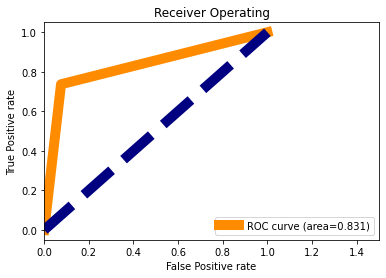

In [61]:
from sklearn.metrics import roc_curve,auc
fpr,trp,thresholds =  roc_curve(pred,y_test)
roc_auc = auc(fpr,trp)

plt.figure()
plt.plot(fpr,trp,color='darkorange',lw=10,label='ROC curve (area=%0.3f)'% roc_auc)
plt.plot([0,1],[0,1],color='navy',lw=10,linestyle='--')
plt.xlim([0.0,1.0])
plt.xlim([0.0,1.5])
plt.xlabel('False Positive rate')
plt.ylabel('True Positive rate')
plt.title('Receiver Operating')
plt.legend(loc='lower right')
plt.show()

In [62]:
import pickle
filename = 'HRA.pkl'
pickle.dump(rf,open(filename,'wb'))

In [63]:
loaded_model = pickle.load(open('HRA.pkl','rb'))
result = loaded_model.score(x_test,y_test)
print(result)

0.9135802469135802


In [65]:
conclusion = pd.DataFrame([loaded_model.predict(x_test)[:],predr[:]],index=["predicted","Original"])

In [66]:
conclusion

0    1    2    3    4    5    6    7    8    9    ...  314  315  \
predicted    0    0    0    1    0    0    0    0    0    0  ...    0    0   
Original     0    0    0    1    0    0    0    0    0    0  ...    0    0   

           316  317  318  319  320  321  322  323  
predicted    0    0    0    0    1    0    0    0  
Original     0    0    0    0    1    0    0    0  

[2 rows x 324 columns]